<a href="https://colab.research.google.com/github/01DaisyLynn/Hypothesis-Testing/blob/main/HYPOTHESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HYPOTHESIS TESTING**

***AUTOLIB DATASET***

*Research question*

Recently a worker at the company claimed that the average/mean sum of Bluecars taken is not the same as what is believed.The company decided to test this claim

Is there evidence that the population mean is different?(level of significance 0.05)



*IMPORTING LIBRARIES*

In [93]:
# Importing the pandas library
import pandas as pd 

# Importing the numpy library
import numpy as np

#Importing scipy
import scipy.stats
from scipy.stats import ttest_1samp
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import random

 *READING DATASET*

In [94]:
df = pd.read_csv("/content/autolib_daily_events_postal_code.csv", encoding='utf-8', delimiter=',')
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


*REVIEWING DATASET*

In [ ]:
#finding no. of rows and columns in dataset
df.shape

(16085, 13)

In [ ]:
#Getting columns in the dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#get the null values
df.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [ ]:
#describing the data set
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
#getting the unique values from each of our columns
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
#finding if any of our data has been duplicated
df.duplicated(keep=False) 

0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

*DATA CLEANING*

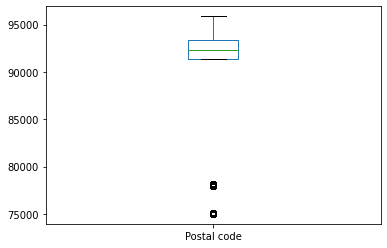

In [128]:
#checking outlier in one colum using boxplot
df.boxplot(column =['Postal code'], grid = False);

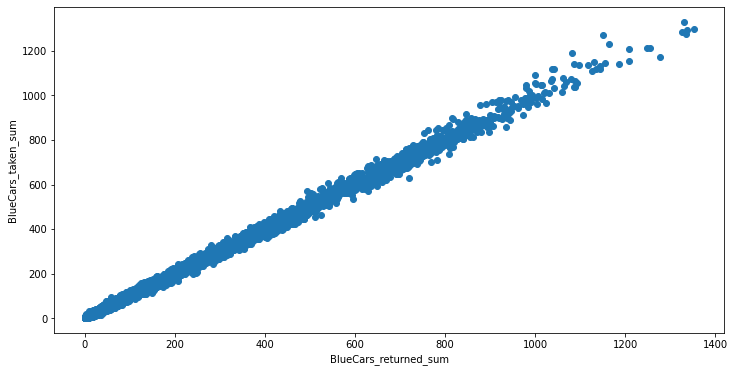

In [ ]:
#Checking for outliers
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['BlueCars_taken_sum'], df['BlueCars_returned_sum'])
ax.set_xlabel('BlueCars_returned_sum')
ax.set_ylabel('BlueCars_taken_sum')
plt.show()

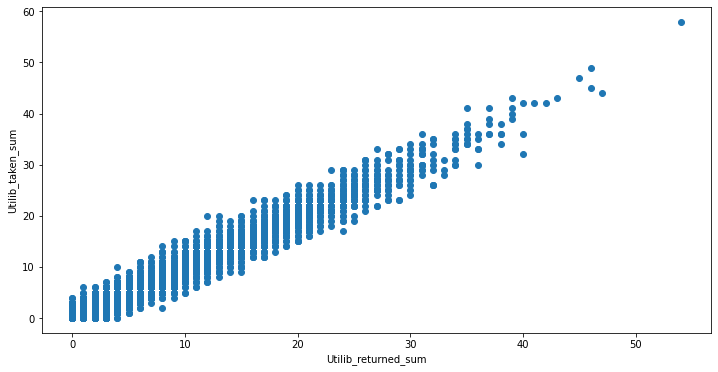

In [ ]:
#Checking for outliers
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Utilib_taken_sum'], df['Utilib_returned_sum'])
ax.set_xlabel('Utilib_returned_sum')
ax.set_ylabel('Utilib_taken_sum')
plt.show()

In [ ]:
#get the null values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [116]:
#Renaming columns
df.rename(columns= {'n_daily_data_points':'Daily_data_points', 'dayOfWeek':'Day of week'}, inplace=True)

In [117]:
#confirming if column names have changed
df.columns

Index(['Postal code', 'date', 'Daily_data_points', 'Day of week', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

***UNIVARIATE ANALYSIS***

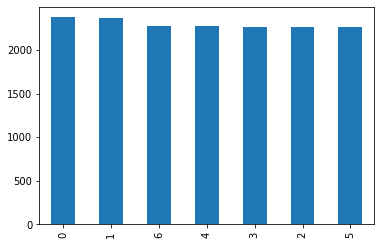

In [ ]:
df['Day of week'].value_counts().plot(kind= 'bar');

#0 and 1 had most car operations occuring

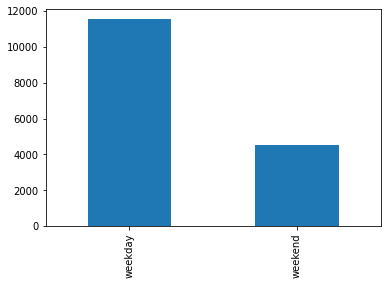

In [ ]:
df['day_type'].value_counts().plot(kind= 'bar');

#most car operation were done during the weekdays

***BIVARIATE ANALYSIS***

Correlation matrix and visualization with heatmap

In [120]:
#convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

df['Daily_data_points'] = en.fit_transform(df['Daily_data_points'])
df['day_type'] = en.fit_transform(df['day_type'])
df

,Postal code,date,Daily_data_points,Day of week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,22,0,0,110,103,3,2,10,9,22,20
1,75001,1/2/2018,20,1,0,98,94,1,1,8,8,23,22
2,75001,1/3/2018,21,2,0,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,3,0,104,104,2,2,9,8,25,21
4,75001,1/5/2018,22,4,0,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,22,4,0,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,22,5,1,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,22,6,1,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,22,0,0,11,14,3,5,2,2,0,0


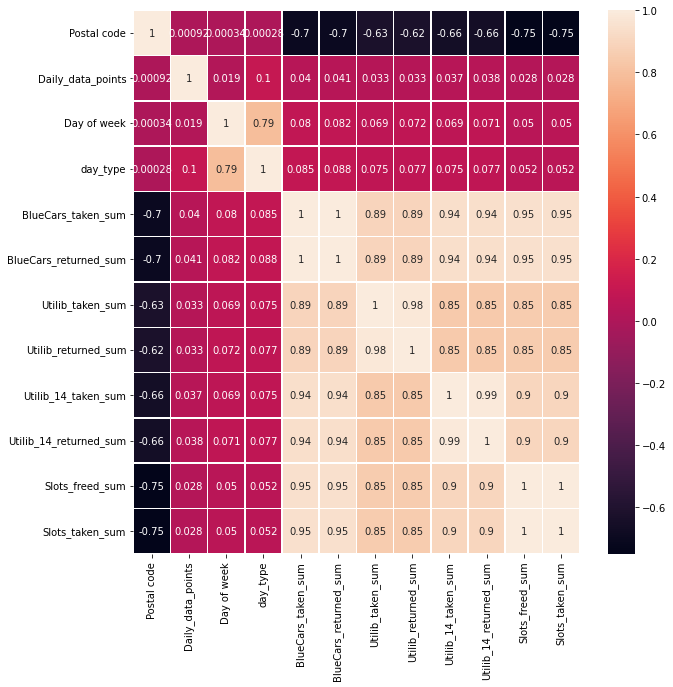

In [122]:
#correlation matrix
matrix = df.corr()
matrix

#visualization  of matrix
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True, linewidths=.5, ax=ax);

Using the scale it shows the higher you go the stronger the relationship between the variables and the lower you go the weaker the relationship

a negative number means a negatively correlated relation while a positive number means a positively correlated relation. 1 being the most positive relation

***HYPOTHESIS TESTING***

In [ ]:
#FIRST GETTING POPULATION MEAN OF BLUECARS TAKEN ON WEEKDAYS

In [ ]:
#grouping day_type column so as to get only accounts taken on weekdays
group_df= df.groupby(['day_type'])
group_df

In [ ]:
#getting the mean
x=group_df.get_group('weekday').mean()
x

#mean of BlueCars_taken_sum is 116.028673 (116.03)

Postal code               88789.959286
n_daily_data_points        1430.007277
dayOfWeek                     1.973926
BlueCars_taken_sum          116.028673
BlueCars_returned_sum       115.639380
Utilib_taken_sum              3.424983
Utilib_returned_sum           3.417620
Utilib_14_taken_sum           7.999047
Utilib_14_returned_sum        7.975485
Slots_freed_sum              20.945166
Slots_taken_sum              20.921431
dtype: float64

In [ ]:
#GETTING THE SAMPLE AND MEAN

In [57]:
#getting the number of BlueCars_taken on the weekdays i.e population size
y=group_df.get_group('weekday').count()
y

#number of BlueCars_taken is 11544

Postal code               11544
date                      11544
n_daily_data_points       11544
dayOfWeek                 11544
day_type                  11544
BlueCars_taken_sum        11544
BlueCars_returned_sum     11544
Utilib_taken_sum          11544
Utilib_returned_sum       11544
Utilib_14_taken_sum       11544
Utilib_14_returned_sum    11544
Slots_freed_sum           11544
Slots_taken_sum           11544
dtype: int64

In [ ]:
#Getting Sample Size

#To get sample size an online calculator was used https://select-statistics.co.uk/calculators/sample-size-calculator-population-proportion/
#This was done by providing the population size 11544, level of confidence 95%,  margin of error 5% and sample proportion of 70%
#The sample size obtained is 314


In [75]:
#getting our random samples
S=group_df.get_group('weekday').sample(314)
S

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5072,92130,3/28/2018,1440,2,weekday,298,310,12,11,18,19,5,6
14936,94410,4/12/2018,1440,3,weekday,24,25,0,0,4,3,0,0
356,75003,2/14/2018,1440,2,weekday,229,235,8,8,16,15,63,67
10430,93130,6/15/2018,1440,4,weekday,23,26,0,0,2,2,0,0
13062,94000,4/9/2018,1440,0,weekday,70,88,4,2,6,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5622,92170,1/10/2018,1440,2,weekday,55,57,0,0,4,2,0,0
1717,75012,1/2/2018,1438,1,weekday,406,412,15,15,22,23,109,109
3685,78140,4/12/2018,1440,3,weekday,26,30,0,0,3,3,0,0
1343,75009,4/9/2018,1440,0,weekday,349,329,6,7,20,19,83,84


In [76]:
#getting the sample mean 
S.mean()

#since our question is on the Bluecars taken the sample mean is 124.97

Postal code               88784.757962
n_daily_data_points        1430.904459
dayOfWeek                     2.073248
BlueCars_taken_sum          124.971338
BlueCars_returned_sum       124.936306
Utilib_taken_sum              3.605096
Utilib_returned_sum           3.528662
Utilib_14_taken_sum           8.541401
Utilib_14_returned_sum        8.522293
Slots_freed_sum              22.286624
Slots_taken_sum              22.302548
dtype: float64

In [83]:
S.std()

Postal code               7570.830537
n_daily_data_points         32.477622
dayOfWeek                    1.449155
BlueCars_taken_sum         182.247232
BlueCars_returned_sum      181.292773
Utilib_taken_sum             5.671247
Utilib_returned_sum          5.626910
Utilib_14_taken_sum         12.408896
Utilib_14_returned_sum      12.637530
Slots_freed_sum             50.216662
Slots_taken_sum             50.397977
dtype: float64

Null hypothesis -mean sum of bluecars taken is 116.03

Alternate hypothesis - mean has changed/ is different from what is believed

In [110]:
#Using z test

#finding the z-score
#population mean = 116.03
#sample mean = 124.97
#std= 182.24

zscore =(124.97-116.03)/182.24
zscore

0.0490561896400351

In [98]:
#finding p-value
alpha = 0.05
p = 1 - norm.cdf(zscore)
p

0.4804372584730492

In [109]:
if p > alpha:
 print("fail to reject null hypothesis")
else:
  print("reject null hypothesis")

fail to reject null hypothesis


*Conclusion*

According to the results we failed to reject the null hypothesis this means that the current mean sum of Bluecars taken on weekdays 116.028 is true

*Suggestions*

The company can invest on better ways of advertising the cars so as to increase the number of operations 